# Intro

In this notebook we will load our different csv files from our reddit article scraping and combine them into one DataFrame. Then we perform the Data Cleaning and save it as a csv file. 

Columns = title | text | url | source | label

Labels = 0 for bad | 1 for good news

# Imports

In [19]:
import numpy as np 
import pandas as pd 
import seaborn as sns

In [98]:
pd.set_option('display.max_colwidth', -1)

<ipython-input-98-0891b765a168>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [14]:
# First, we load the csv files and combine them to one 

import os
import glob
import pandas as pd
os.chdir("C:\\Users\\svenr\\nf-okt-20\\final project\\twitter-scraping\\reddit_news_data\\cleaned")


extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv("reddit_combined.csv", index=False, encoding='utf-8-sig')

In [15]:
df = pd.read_csv("reddit_combined.csv")

In [16]:
df.shape

(3086, 5)

In [17]:
df.head()

,title,url,article_txt,source,label
0,"The World’s 2,000 Billionaires Have More Wealt...",https://finance.yahoo.com/news/world-2-000-bil...,"Wealth inequality is nothing new, but it’s rea...",CollapseNews,0
1,1 in 4 Childless Adults Say Climate Change Has...,https://morningconsult.com/2020/09/28/adults-c...,11% of childless adults say climate change is ...,CollapseNews,0
2,America Is Too Broken to Fight the Coronavirus...,https://www.nytimes.com/2020/06/22/opinion/us-...,When coronavirus cases started exploding on th...,CollapseNews,0
3,The Brazilian president has fired the head of ...,https://www.climatechangenews.com/2019/08/05/b...,The Brazilian president forced a top science o...,CollapseNews,0
4,Coronavirus has led to the largest ever drop i...,https://www.carbonbrief.org/analysis-coronavir...,The global coronavirus pandemic continues to u...,CollapseNews,0


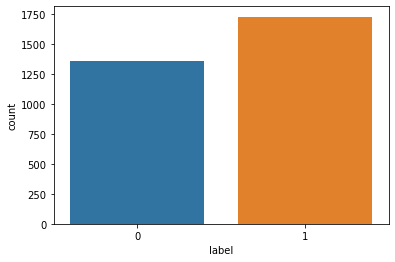

In [20]:
# 1 = bad 
# 0 = good 
sns.countplot(x=df.label);

In [22]:
df.label.value_counts()

1    1727
0    1359
Name: label, dtype: int64

In [27]:
# Rename the column article_txt
df.rename(columns={"article_txt": "text"}, inplace=True)

# Data Cleaning

In [24]:
# Function to find specific keywords in the text 
# We want to delete rows where the text is not the actual news article

In [53]:
# Example: We can try to find the texts where an "accept cookies" message appears
l = []
for row in df.text:
    if "cookies" in row: 
        l.append(row)  
print(len(l))

115


In [79]:
df = df[[True if 'cookies' not in i else False for i in df.text.values]]
df.shape

(2971, 5)

In [91]:
def find_keyword(keyword):
    l = []
    for row in df.text:
        if keyword in row: 
            l.append(row)
            
    print("Count: ", len(l))

In [92]:
find_keyword("log in")

Count:  10


In [93]:
df = df[[True if 'log in' not in i else False for i in df.text.values]]
df.shape

(2961, 5)

In [94]:
find_keyword("sign in")

Count:  5


In [95]:
df = df[[True if 'sign in' not in i else False for i in df.text.values]]
df.shape

(2956, 5)

In [112]:
find_keyword("404")

Count:  3


In [113]:
df = df[[True if '404' not in i else False for i in df.text.values]]
df.shape

(2953, 5)

In [128]:
# Check for small texts 
count = 0 
l = []
for row in df.text:
    if 200 > len(row): 
        #print(row)
        #print("---"*30)
        count += 1 
        l.append(row)
print("Count: ", count)
print(df.shape)

Count:  159
(2953, 5)


In [124]:
l[0:20]

["No officers charged directly in Breonna Taylor's death; 1 faces 3 counts over shooting into neighboring apartments No officers charged directly in Breonna Taylor's death; 1 faces 3 counts over shooting into neighboring apartments",
 '\'Zombie\' firms are staying alive with coronavirus relief: IIF\n\nAs many as 15% of companies listed on major stock exchanges may be "zombie" firms that cannot survive without exceptional governmental assistance amid the coronavirus pandemic, says Sonja Gibbs of the Institute of International Finance.',
 'However, they come even as thousands of migrants are walking on the highways after fleeing cities to try and go back to their villages. Many are walking with little food and water, and will be among the most exposed to the weather.',
 'No ads, always HD experience with Gfycat Pro.',
 'Become an FT subscriber to read:\n\nLeverage our market expertise\n\nExpert insights, analysis and smart data help you cut through the noise to spot trends, risks and opp

In [131]:
# We can see that there around 200 texts which are pretty short, so we delete them
df[df['text'].map(len) > 200].shape

(2792, 5)

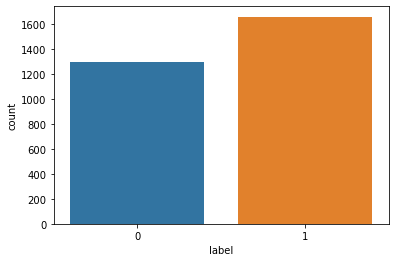

In [134]:
sns.countplot(x=df.label);

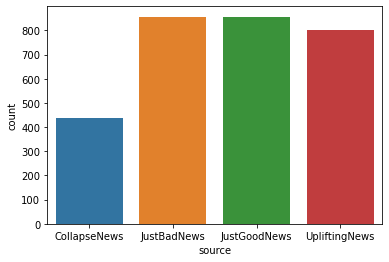

In [137]:
sns.countplot(x=df.source);

# Export

In [140]:
# Safe the new/cleaned dataframe as csv 
df.to_csv("reddit_combined_cleaned.csv", index=False)